In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read the dataset
df = pd.read_csv('train_dataset_final1.csv')
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [414]:
print(df.shape)
print(df.info())
print(df.describe())

(25247, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float

In [415]:
# Missing values
print(df.isnull().sum())

# Unique values in categoricals
for col in ['sex', 'education', 'marriage']:
    print(col, df[col].unique())

#in age replace nulls with mean
df['age'].fillna(df['age'].mean(), inplace=True)

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64
sex [0 1]
education [2 1 3 4 5 6 0]
marriage [2 1 3 0]


C:\Users\krish\AppData\Local\Temp\ipykernel_146648\1185568460.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


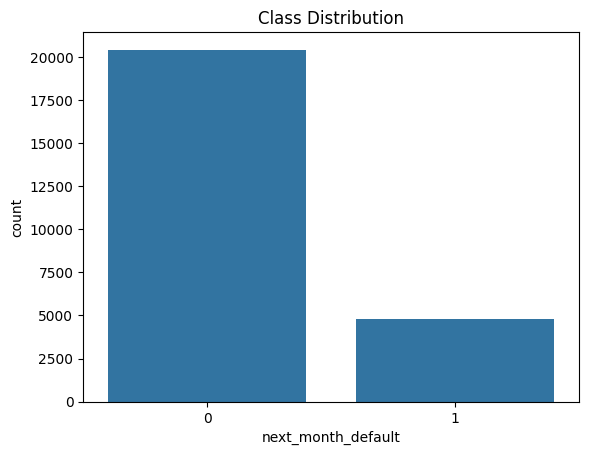

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64


In [416]:
# Target variable distribution
sns.countplot(x='next_month_default', data=df)
plt.title("Class Distribution")
plt.show()

print(df['next_month_default'].value_counts(normalize=True))

# -> 20% of users are likely to default next month

Total rows in the dataset: 25247


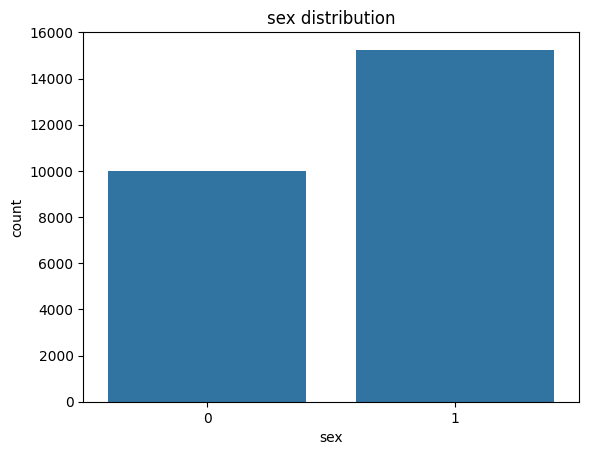

sex unique values: [0 1]
sex
1    60.411138
0    39.588862
Name: proportion, dtype: float64
sex
1    15252
0     9995
Name: count, dtype: int64


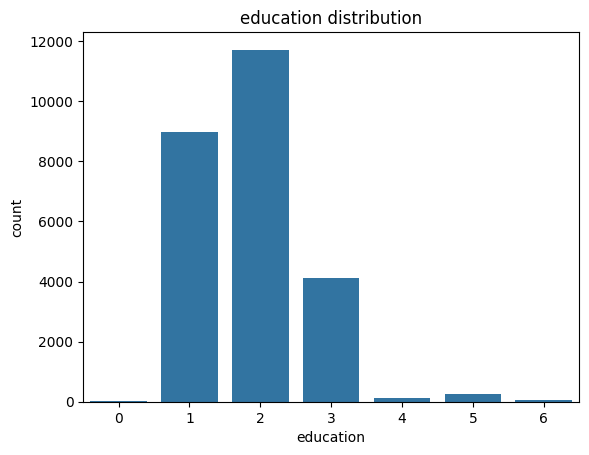

education unique values: [2 1 3 4 5 6 0]
education
2    46.409474
1    35.600269
3    16.298966
5     1.002099
4     0.459461
6     0.174278
0     0.055452
Name: proportion, dtype: float64
education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64


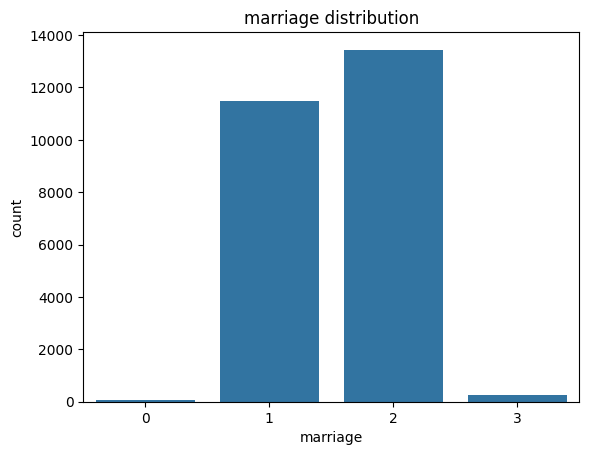

marriage unique values: [2 1 3 0]
marriage
2    53.238008
1    45.470749
3     1.081317
0     0.209926
Name: proportion, dtype: float64
marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64


In [417]:
categorical_cols = ['sex', 'education', 'marriage']

#print total rows in the dataset
print("Total rows in the dataset:", len(df))

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()
    print(f"{col} unique values:", df[col].unique())
    print(df[col].value_counts(normalize=True) * 100)
    print(df[col].value_counts())

# 297 outliers for education
# 273 outliers for marriage
# Very less married people in the dataset -> only 53 out of 25247

#In marriage replace 3+ with median of 0,1,2
df['marriage'] = df['marriage'].replace(0, 3)

#In edu replace 3+ with median of 0,1,2
df['education'] = df['education'].replace(0, 4)
df['education'] = df['education'].replace(5, 4)
df['education'] = df['education'].replace(6, 4)


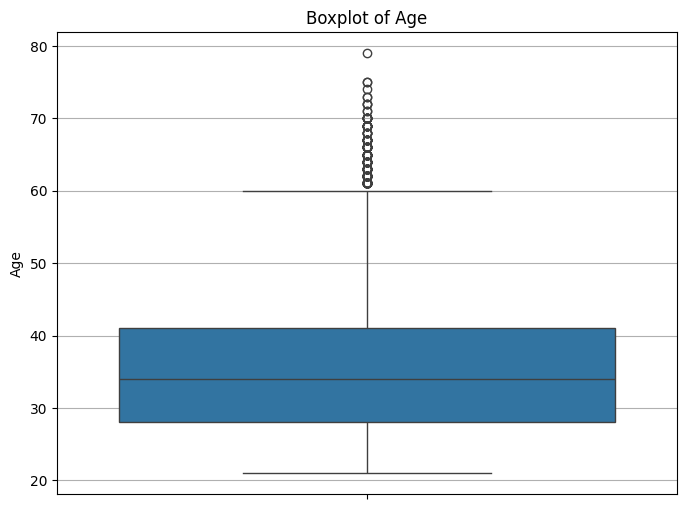

Number of outliers in age: 217
(25247, 27)
(25247, 27)


In [418]:
# Boxplot for age
plt.figure(figsize=(8, 6))

sns.boxplot(y='age', data=df)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

# Number of outliers in age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in age: {len(outliers)}')


# Capping the outliers to upper IQR bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(df.shape)
df['age'] = df['age'].clip(lower=lower_bound, upper=upper_bound)
print(df.shape)



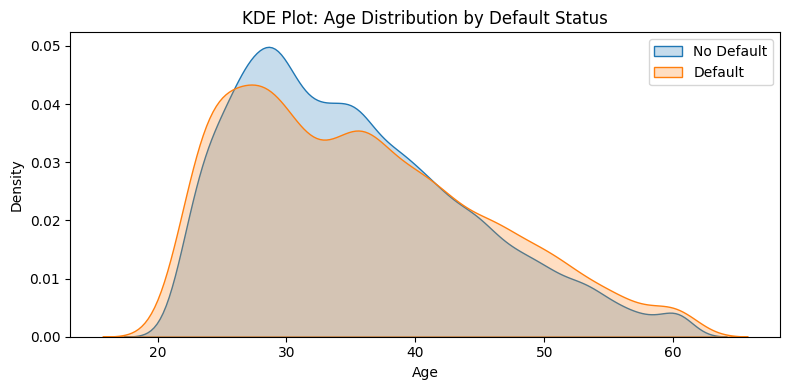

In [419]:

# KDE plot: Age distributions split by default status
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 0],
    x='age',
    label='No Default',
    fill=True,
    color="#1f77b4"
)
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='age',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
plt.title("KDE Plot: Age Distribution by Default Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

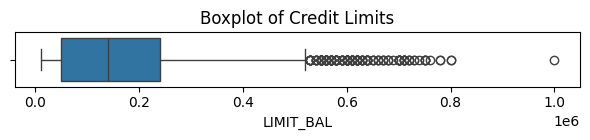

In [420]:
# EDA for Limit Balance
# 2. Boxplot of Credit Limit
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title("Boxplot of Credit Limits")
plt.tight_layout()
plt.show()

In [421]:
# number of outliers in LIMIT_BAL

Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['LIMIT_BAL'] < (Q1 - 1.5 * IQR)) | (df['LIMIT_BAL'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in LIMIT_BAL: {len(outliers)}')

# Capping the outliers to upper IQR bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(df.shape)
df['LIMIT_BAL'] = df['LIMIT_BAL'].clip(lower=lower_bound, upper=upper_bound)
# Print dimensions after cleaning
print("Shape after capping LIMIT_BAL outliers:", df.shape)

Number of outliers in LIMIT_BAL: 148
(25247, 27)
Shape after capping LIMIT_BAL outliers: (25247, 27)


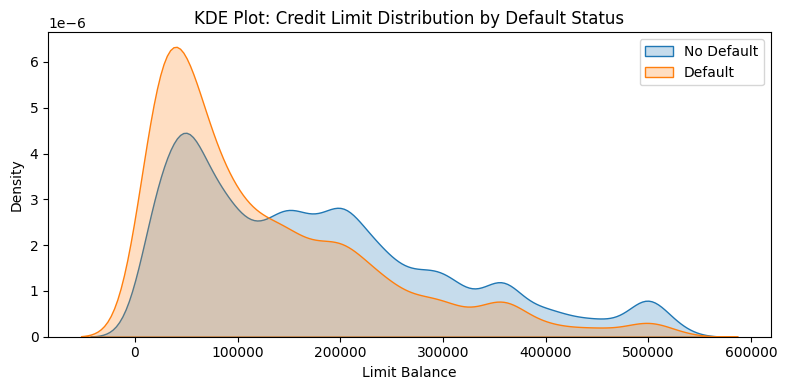

In [422]:
# kde plot for Limit Balance with default status

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 0],
    x='LIMIT_BAL',
    label='No Default',
    fill=True,
    color="#1f77b4"
)
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='LIMIT_BAL',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
plt.title("KDE Plot: Credit Limit Distribution by Default Status")
plt.xlabel("Limit Balance")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

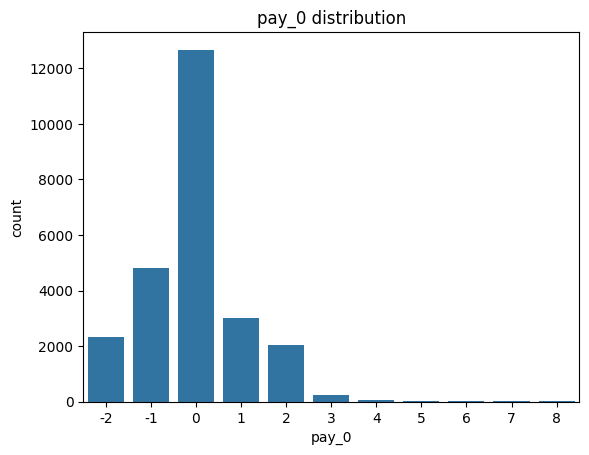

pay_0 unique values: [ 2  0 -2 -1  1  8  4  3  5  6  7]
pay_0 value counts:
 pay_0
 0    12667
-1     4821
 1     3030
-2     2331
 2     2047
 3      244
 4       56
 5       21
 8       14
 6        8
 7        8
Name: count, dtype: int64


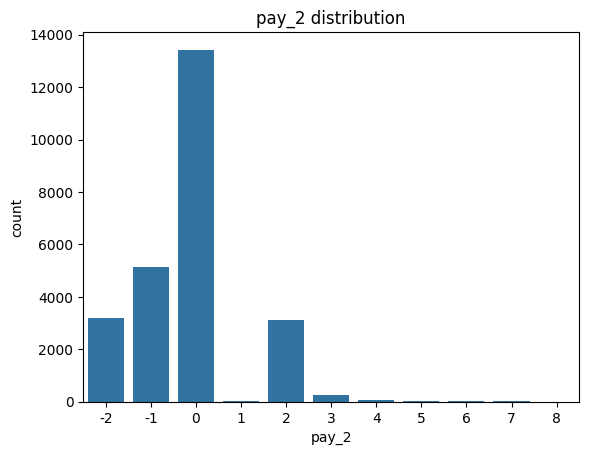

pay_2 unique values: [ 2  0 -2 -1  7  4  3  1  5  6  8]
pay_2 value counts:
 pay_2
 0    13424
-1     5128
-2     3210
 2     3098
 3      239
 4       77
 1       25
 5       19
 7       15
 6       11
 8        1
Name: count, dtype: int64


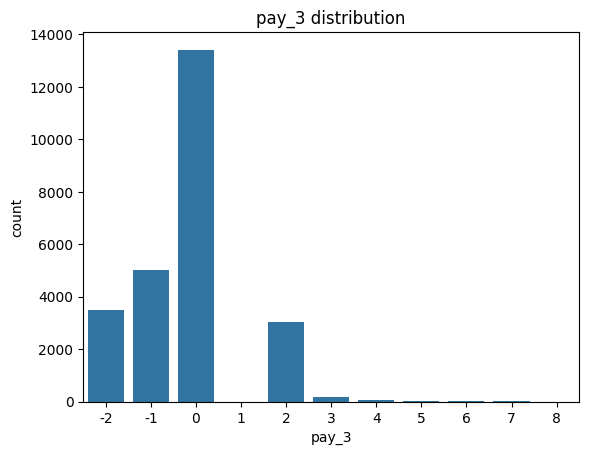

pay_3 unique values: [ 2 -2  0 -1  6  3  4  1  7  5  8]
pay_3 value counts:
 pay_3
 0    13415
-1     5019
-2     3480
 2     3039
 3      179
 4       57
 7       18
 5       18
 6       17
 1        4
 8        1
Name: count, dtype: int64


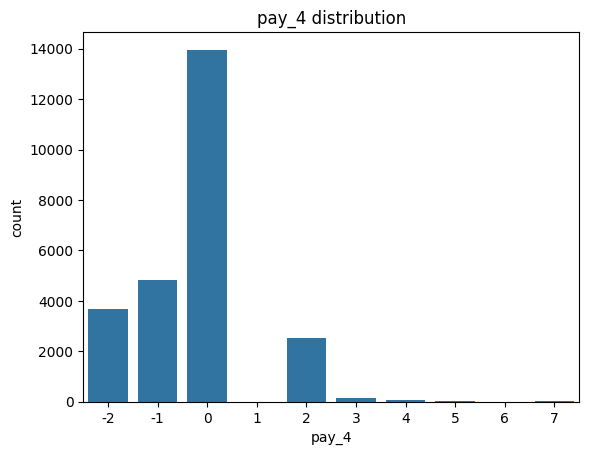

pay_4 unique values: [ 0 -2 -1  2  5  3  4  7  6  1]
pay_4 value counts:
 pay_4
 0    13961
-1     4816
-2     3694
 2     2509
 3      137
 4       52
 7       43
 5       29
 6        4
 1        2
Name: count, dtype: int64


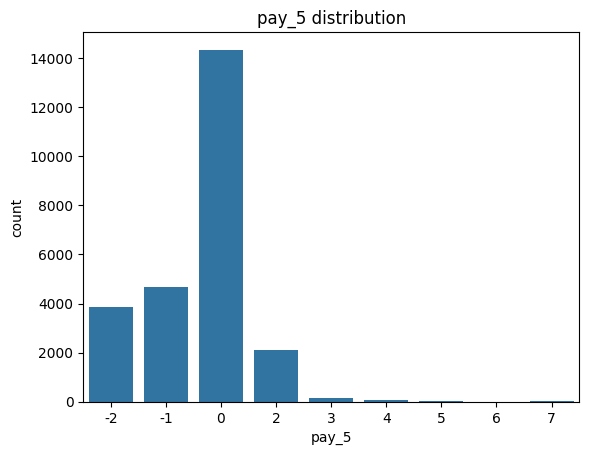

pay_5 unique values: [ 0 -1 -2  2  4  3  6  7  5]
pay_5 value counts:
 pay_5
 0    14345
-1     4680
-2     3859
 2     2100
 3      133
 4       72
 7       43
 5       14
 6        1
Name: count, dtype: int64


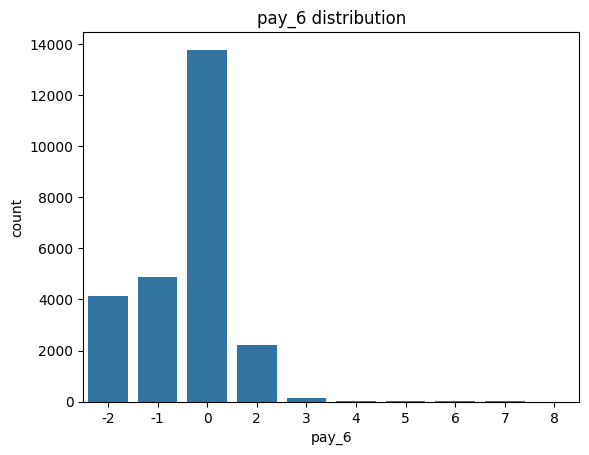

pay_6 unique values: [ 0 -2 -1  2  3  4  5  7  6  8]
pay_6 value counts:
 pay_6
 0    13769
-1     4882
-2     4139
 2     2223
 3      134
 4       41
 7       34
 6       14
 5       10
 8        1
Name: count, dtype: int64


In [423]:
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in pay_status_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()
    print(f"{col} unique values:", df[col].unique())
    print(f"{col} value counts:\n", df[col].value_counts())
    

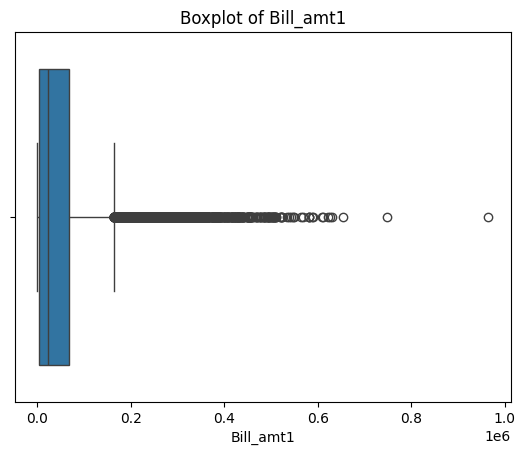

Negative values in bill columns:
0
Number of outliers in Bill_amt1: 1986
Shape after capping bill amounts outliers: (25247, 27)


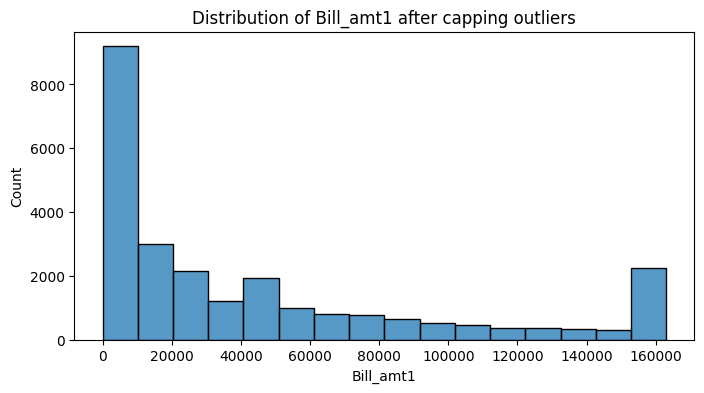

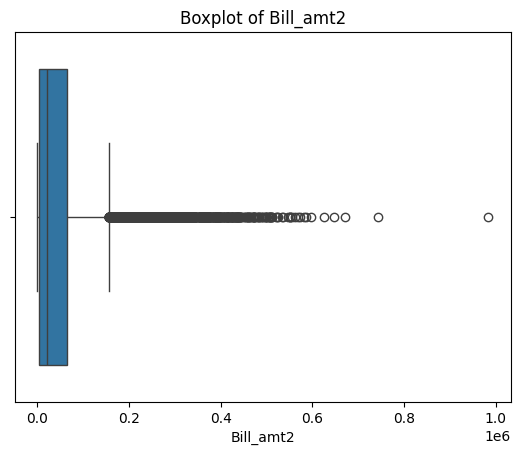

Negative values in bill columns:
0
Number of outliers in Bill_amt2: 1992
Shape after capping bill amounts outliers: (25247, 27)


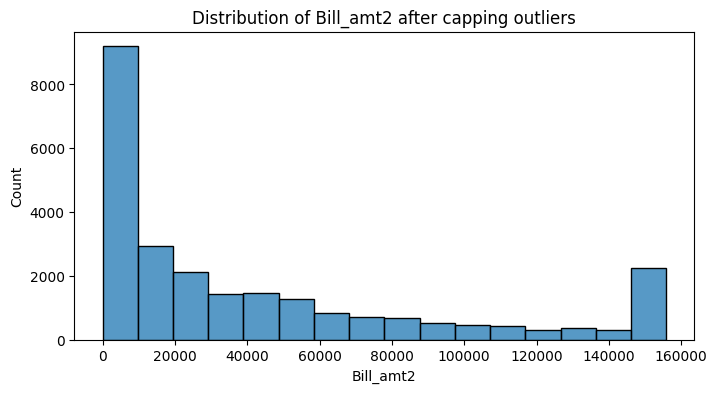

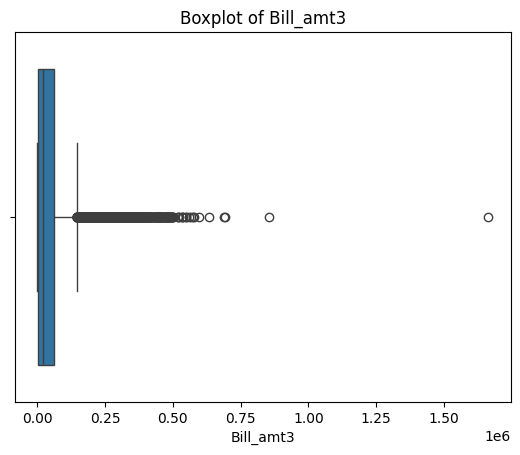

Negative values in bill columns:
0
Number of outliers in Bill_amt3: 2063
Shape after capping bill amounts outliers: (25247, 27)


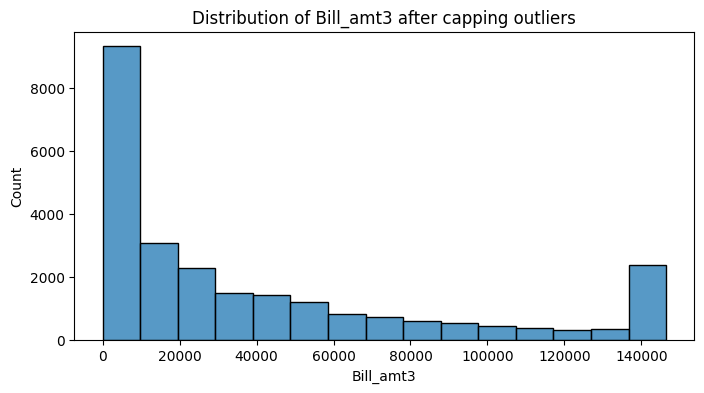

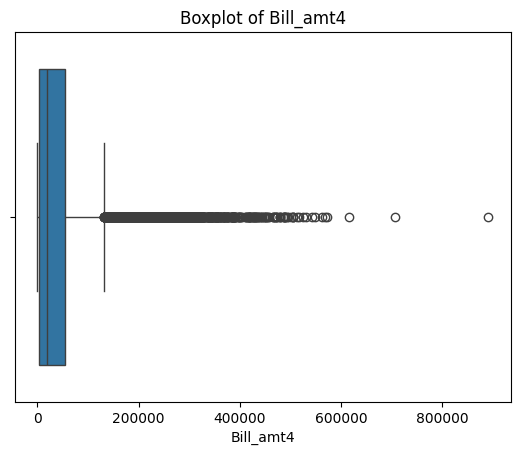

Negative values in bill columns:
0
Number of outliers in Bill_amt4: 2206
Shape after capping bill amounts outliers: (25247, 27)


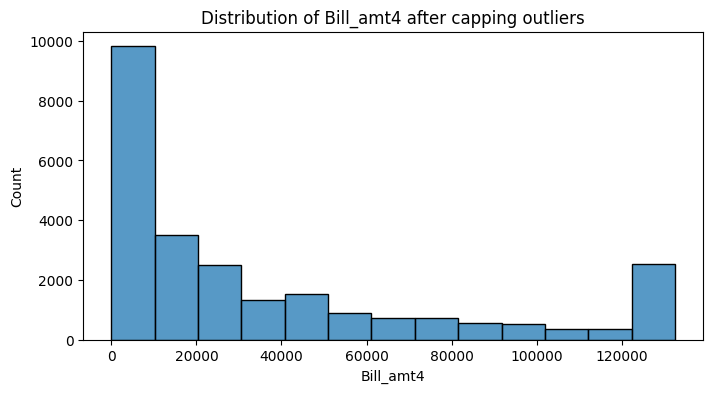

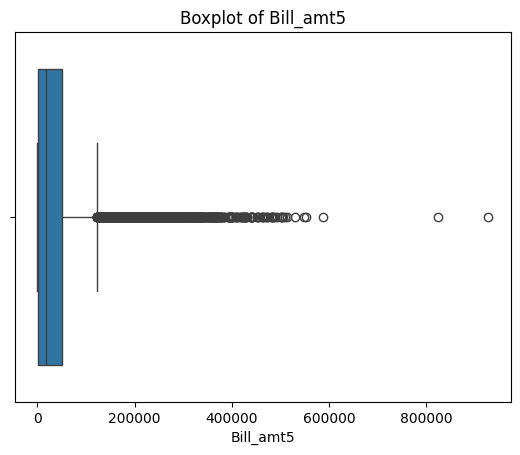

Negative values in bill columns:
0
Number of outliers in Bill_amt5: 2279
Shape after capping bill amounts outliers: (25247, 27)


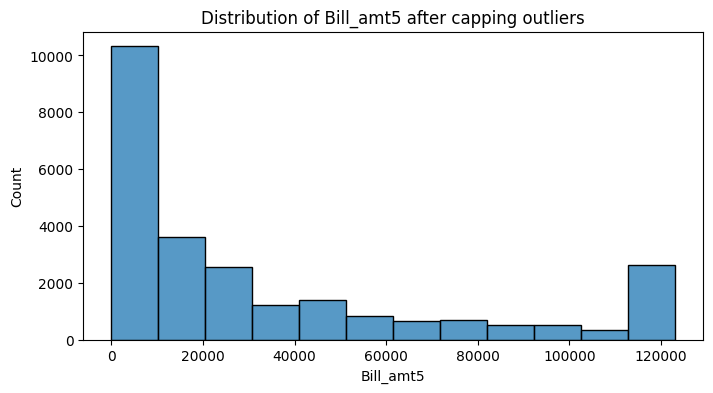

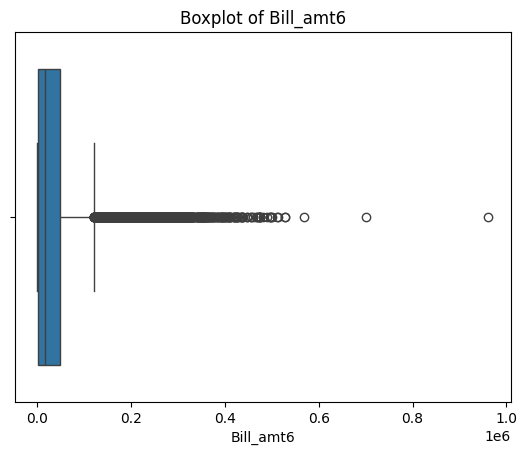

Negative values in bill columns:
0
Number of outliers in Bill_amt6: 2246
Shape after capping bill amounts outliers: (25247, 27)


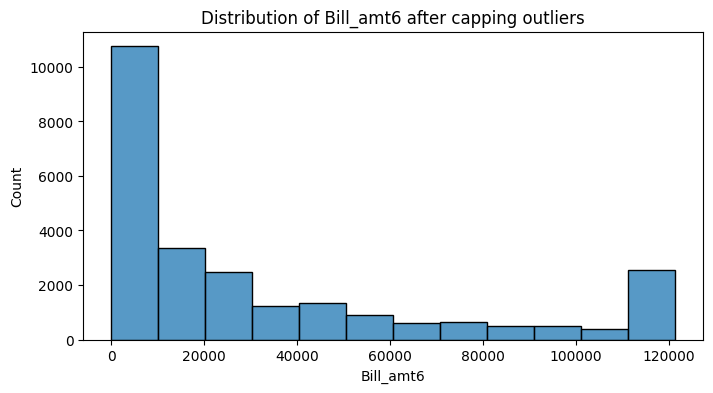

In [424]:

# print("Shape after dropping outliers:", df.shape)

bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

for col in bill_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# Check for negative values in bill columns
    print("Negative values in bill columns:")
    print(df[col].lt(0).sum())
# If negative values exist, replace them with 0
    df[col] = df[col].clip(lower=0)
# Clip the bill amounts with IQR method
# Capping the bill amounts to upper IQR bound
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
# print number of outliers in bill amounts
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Number of outliers in {col}: {len(outliers)}')
    df[col] = df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
# Print dimensions after cleaning
    print("Shape after capping bill amounts outliers:", df.shape)
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], binwidth=10000)
    plt.title(f'Distribution of {col} after capping outliers')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



# check if negative values exist in bill columns
# print("Negative values in bill columns:")
# print(df[bill_cols].lt(0).sum())
# # if yes, replace negative values with 0
# df[bill_cols] = df[bill_cols].clip(lower=0)


#now using iqr to cap the bill and pay amounts
#plotting the boxplot for bill amounts
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[bill_cols])
# plt.title("Boxplot of Bill Amounts")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Number of outliers in bill amounts
# Q1 = df[bill_cols].quantile(0.25)
# Q3 = df[bill_cols].quantile(0.75)
# IQR = Q3 - Q1
# outliers = df[(df[bill_cols] < (Q1 - 1.5 * IQR)) | (df[bill_cols] > (Q3 + 1.5 * IQR))].any(axis=1)
# print(f'Number of outliers in bill amounts: {len(outliers)}')


# # Capping the bill amounts to upper IQR bound
# Q1 = df[bill_cols].quantile(0.25)
# Q3 = df[bill_cols].quantile(0.75)
# IQR = Q3 - Q1
# # Capping the bill amounts to upper IQR bound
# df[bill_cols] = df[bill_cols].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)


# pay_cols = [f'pay_amt{i}' for i in range(1, 7)]


# # Filter rows where all bill values < 300000
# bill_condition = (df[bill_cols] < 250000).all(axis=1)


# # Filter rows where all pay values < 75000
# pay_condition = (df[pay_cols] < 40000).all(axis=1)

# # Combine both
# df = df[bill_condition & pay_condition]

# print("✅ Shape after filtering:", df.shape)

# for col in bill_cols:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(df[col], binwidth=10000)
#     plt.title(f'Distribution of {col} after capping at 3L')
#     plt.xlabel(col)
#     plt.ylabel("Count")
#     plt.show()

# # Payment columns histogram
# for col in pay_cols:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(df[col], binwidth=5000)
#     plt.title(f'Distribution of {col} after capping at 75K')
#     plt.xlabel(col)
#     plt.ylabel("Count")
#     plt.show()


# # Draw line plots for bill and pay amounts i.e. avg bill_i for default and non-default users
# bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
# pay_cols = [f'pay_amt{i}' for i in range(1, 7)]

# # reverse the bill_cols and pay_cols to match the original order in the dataset
# bill_cols.reverse()
# pay_cols.reverse()

# bill_means = df.groupby('next_month_default')[bill_cols].mean().T
# bill_means.columns = ['No Default', 'Default']
# bill_means.plot(kind='line', marker='o', figsize=(10, 6))
# plt.title('Average Bill Amounts by Default Status')
# plt.xlabel('Bill Amounts')
# plt.ylabel('Average Amount')
# plt.xticks(rotation=45)
# plt.grid()
# plt.legend(title='Default Status')
# plt.tight_layout()
# plt.show()


# pay_means = df.groupby('next_month_default')[pay_cols].mean().T
# pay_means.columns = ['No Default', 'Default']
# pay_means.plot(kind='line', marker='o', figsize=(10, 6))
# plt.title('Average Payment Amounts by Default Status')
# plt.xlabel('Payment Amounts')
# plt.ylabel('Average Amount')
# plt.xticks(rotation=45)
# plt.grid()
# plt.legend(title='Default Status')
# plt.tight_layout()
# plt.show()


# see later

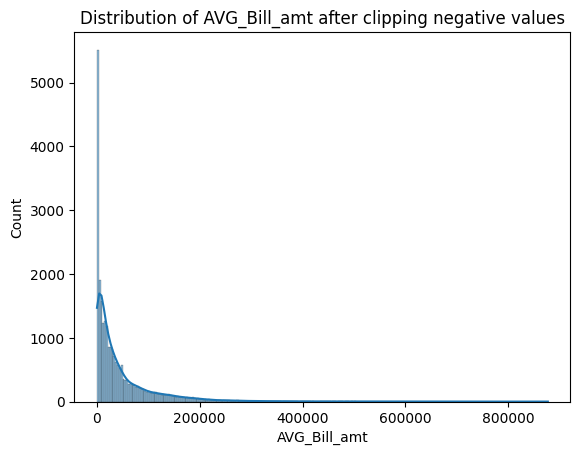

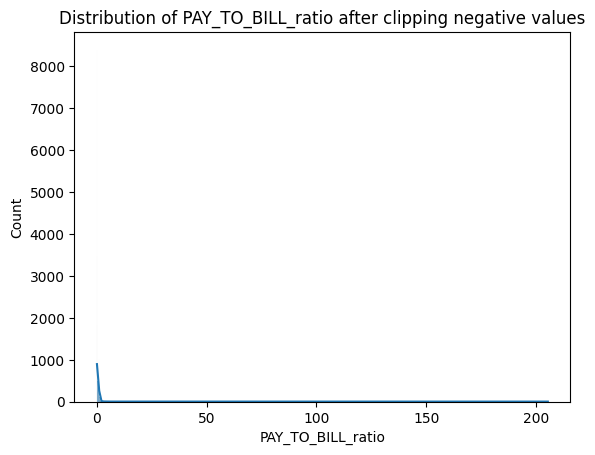

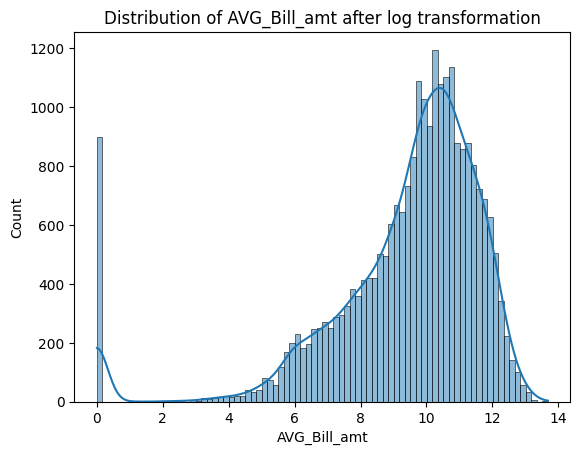

After capping, AVG_Bill_amt shape: (25247,)


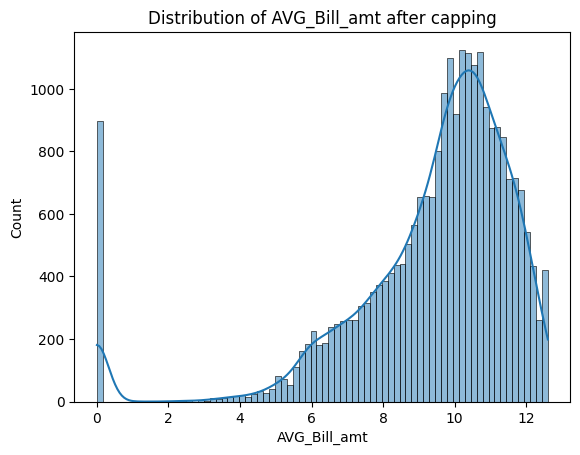

After capping, PAY_TO_BILL_ratio shape: (25247,)


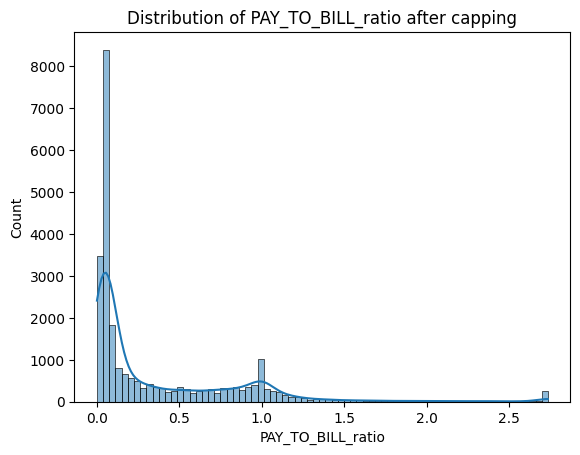

In [425]:
eng_cols = ['AVG_Bill_amt', 'PAY_TO_BILL_ratio']

# for col in eng_cols:
#     # lower = df[col].quantile(0.005)
#     # upper = df[col].quantile(0.975)
#     # df = df[(df[col] >= lower) & (df[col] <= upper)]
#     # df.reset_index(drop=True, inplace=True)
#     # print(f"After capping, {col} shape: {df[col].shape}")
#     # now plot
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col} after capping')
#     plt.show()

# clip eng_cols to 0.005 and 0.975 quantiles
# for col in eng_cols:
#     lower = df[col].quantile(0.005)
#     upper = df[col].quantile(0.975)
#     df[col] = df[col].clip(lower=lower, upper=upper)
#     print(f"After capping, {col} shape: {df[col].shape}")
#     # now plot
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col} after capping')
#     plt.show()


#make negative values in engineering columns to 0
for col in eng_cols:
    df[col] = df[col].clip(lower=0)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after clipping negative values')
    plt.show()

#apply log transformation to engineering columns
for col in eng_cols:
    if(col == 'PAY_TO_BILL_ratio'):
        continue
    df[col] = np.log1p(df[col])  # log1p handles zero values correctly
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after log transformation')
    plt.show()

# Clip the engineering columns to 0.005 and 0.975 quantiles
for col in eng_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower, upper=upper)
    print(f"After capping, {col} shape: {df[col].shape}")
    # now plot
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after capping')
    plt.show()
    
# see later

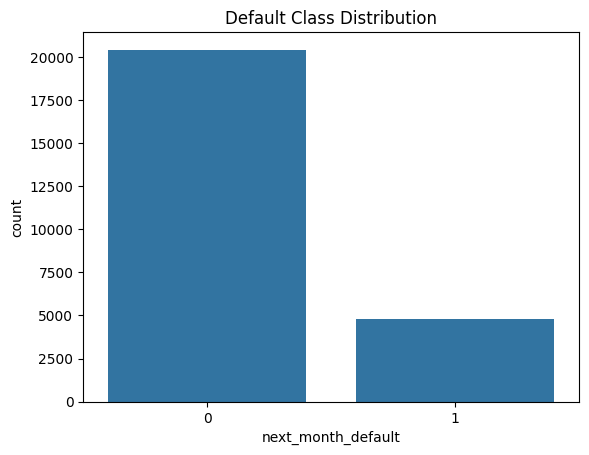

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64


In [426]:
sns.countplot(x='next_month_default', data=df)
plt.title('Default Class Distribution')
plt.show()

print(df['next_month_default'].value_counts(normalize=True))


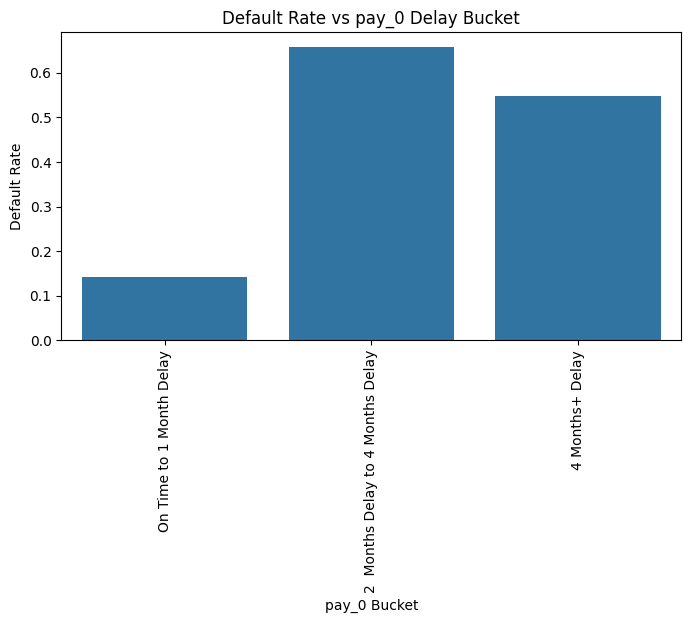

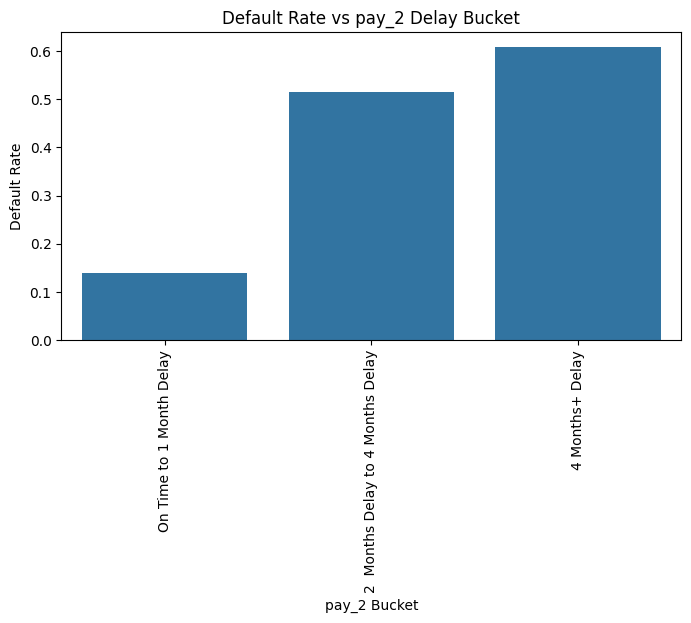

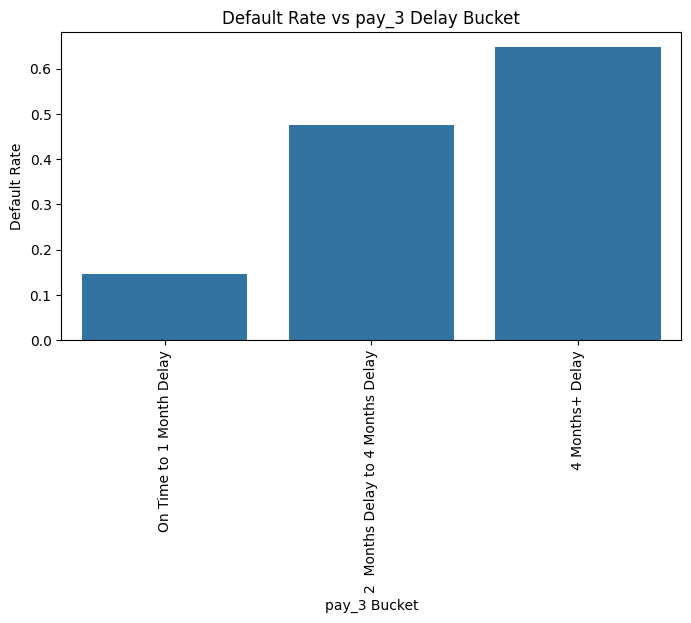

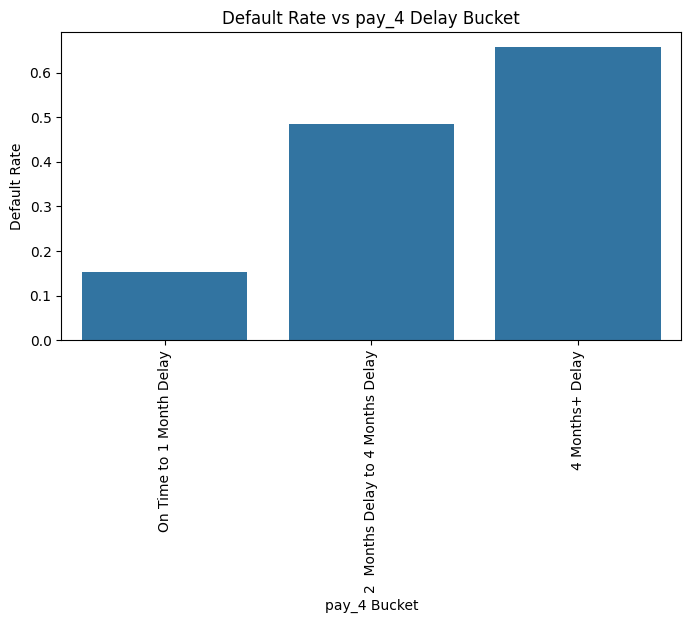

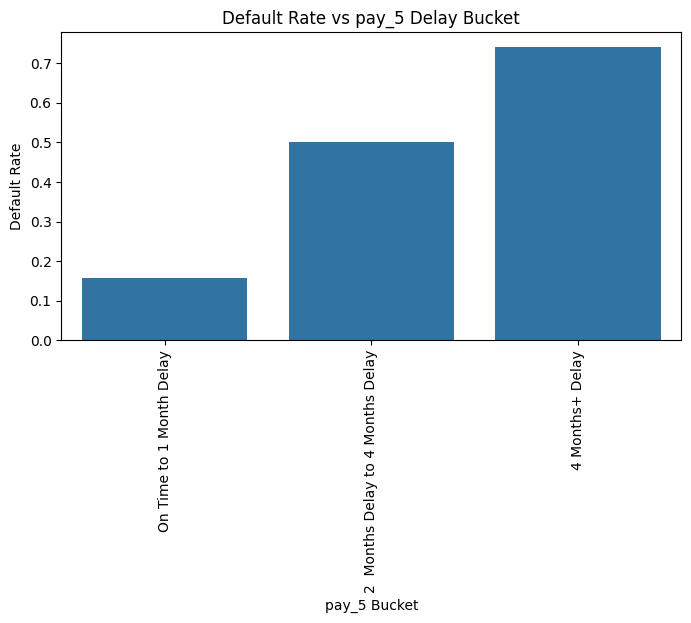

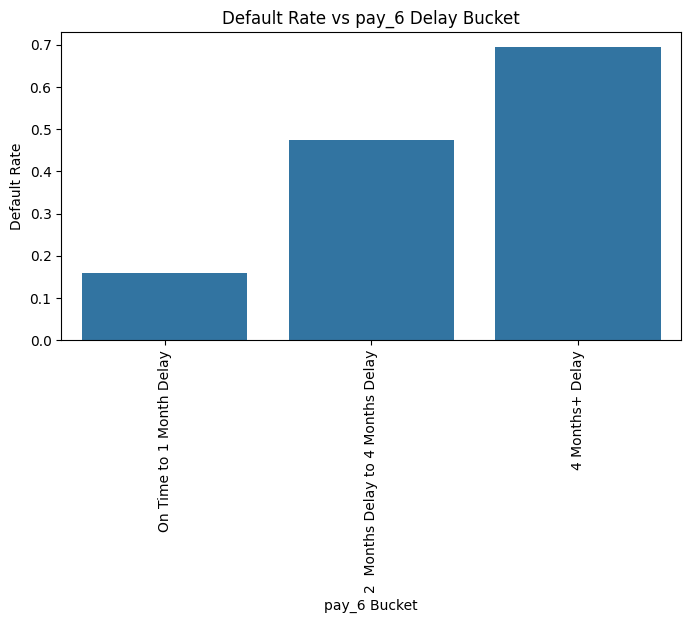

In [427]:
#for pay_0 to pay_6, create buckets and plot default rate
for col in pay_status_cols[:]:
    df[f'{col}_bucket'] = df[col].apply(delay_bucket)
    grouped = df.groupby(f'{col}_bucket')['next_month_default'].agg(['mean', 'count']).reset_index()
    grouped.columns = [f'{col}_bucket', 'default_rate', 'count']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=f'{col}_bucket', y='default_rate', data=grouped, order=[
        'On Time to 1 Month Delay', 
        '2  Months Delay to 4 Months Delay', 
        '4 Months+ Delay'
    ])
    plt.xticks(rotation=90)
    plt.title(f'Default Rate vs {col} Delay Bucket')
    plt.ylabel('Default Rate')
    plt.xlabel(f'{col} Bucket')
    plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\457559535.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_limit = df.groupby('LIMIT_BAL_bucket')['next_month_default'].agg(['mean', 'count']).reset_index()


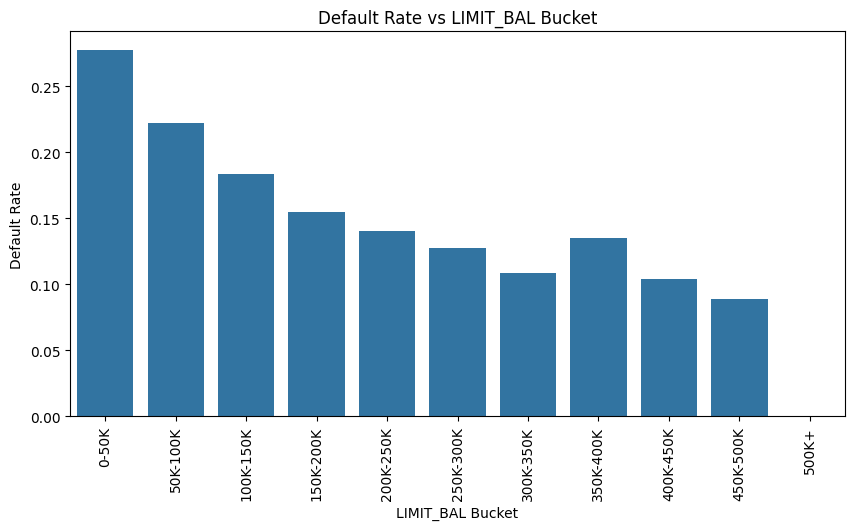

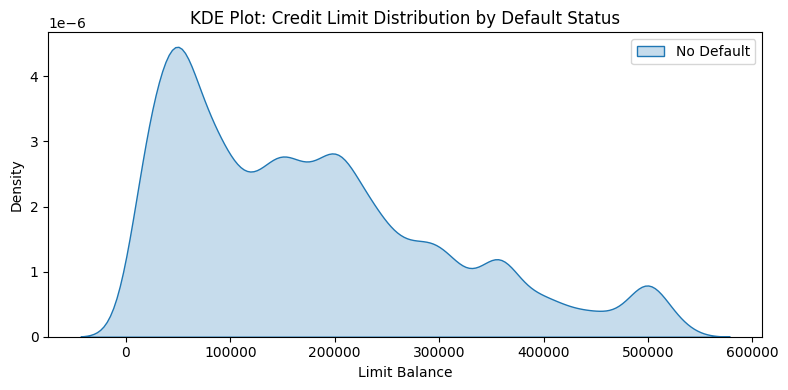

In [428]:
# Create LIMIT_BAL buckets
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 5000000, np.inf]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', '400K-450K', '450K-500K', '500K+']

df['LIMIT_BAL_bucket'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels)

# Compute default rate for each LIMIT_BAL bucket
grouped_limit = df.groupby('LIMIT_BAL_bucket')['next_month_default'].agg(['mean', 'count']).reset_index()

grouped_limit.columns = ['LIMIT_BAL_bucket', 'default_rate', 'count']
# Plot default rate for LIMIT_BAL buckets
plt.figure(figsize=(10, 5))
sns.barplot(x='LIMIT_BAL_bucket', y='default_rate', data=grouped_limit)
plt.xticks(rotation=90)
plt.title('Default Rate vs LIMIT_BAL Bucket')
plt.ylabel('Default Rate')
plt.xlabel('LIMIT_BAL Bucket')
plt.show()


#also plot a continuous plot for LIMIT_BAL something like a kde plot
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 0],
    x='LIMIT_BAL',
    label='No Default',
    fill=True,
    color="#1f77b4"
)

plt.title("KDE Plot: Credit Limit Distribution by Default Status")
plt.xlabel("Limit Balance")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()




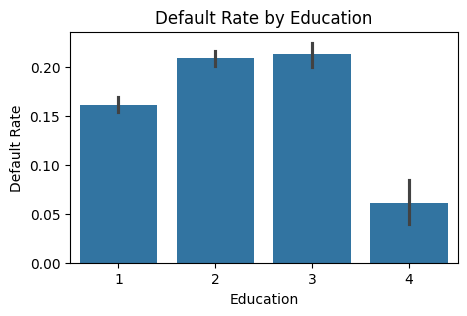

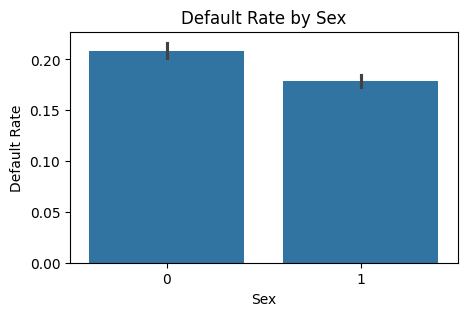

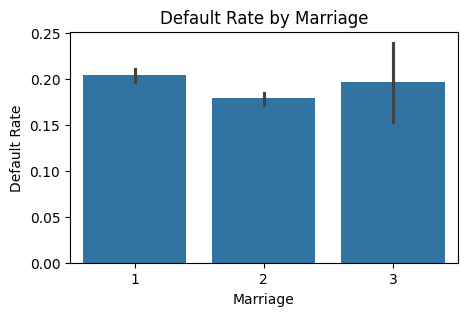

In [429]:
categorical_vars = ['education', 'sex', 'marriage']

for var in categorical_vars:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=var, y='next_month_default', data=df)
    plt.title(f'Default Rate by {var.capitalize()}')
    plt.ylabel('Default Rate')
    plt.xlabel(var.capitalize())
    plt.show()


In [430]:

df.drop(columns=['Customer_ID'], inplace=True)


In [431]:
# Show unique values
for col in ['sex', 'education', 'marriage']:
    print(f"{col}: {df[col].unique()}")


sex: [0 1]
education: [2 1 3 4]
marriage: [2 1 3]


In [432]:
df['sex'] = df['sex'].astype('category')
df['education'] = df['education'].astype('category')
df['marriage'] = df['marriage'].astype('category')
df['next_month_default'] = df['next_month_default'].astype('category')


In [433]:
#print dimensions of the dataset
print("Final dataset shape:", df.shape)


Final dataset shape: (25247, 33)


# ADVANCED EDA

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\1442291507.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['next_month_default'] == 1][col], shade=True)


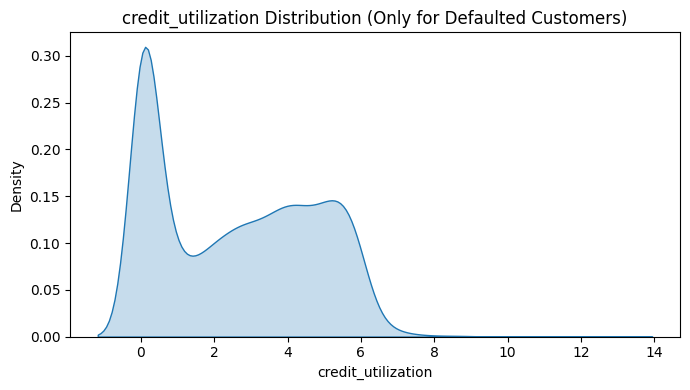

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\1442291507.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['next_month_default'] == 1][col], shade=True)


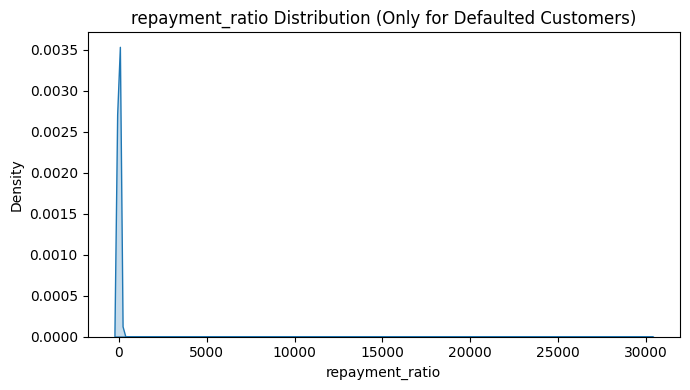

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\1442291507.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['next_month_default'] == 1][col], shade=True)


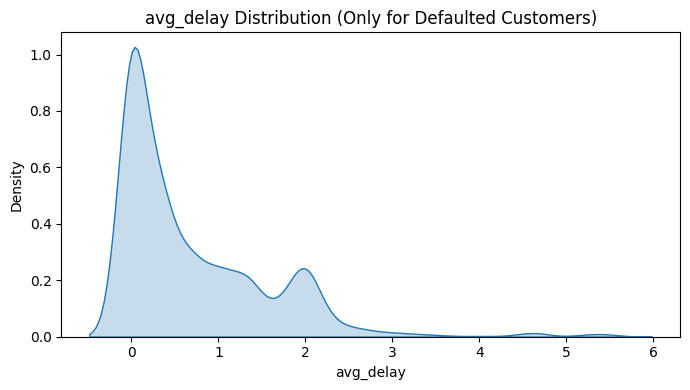

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\1442291507.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['next_month_default'] == 1][col], shade=True)


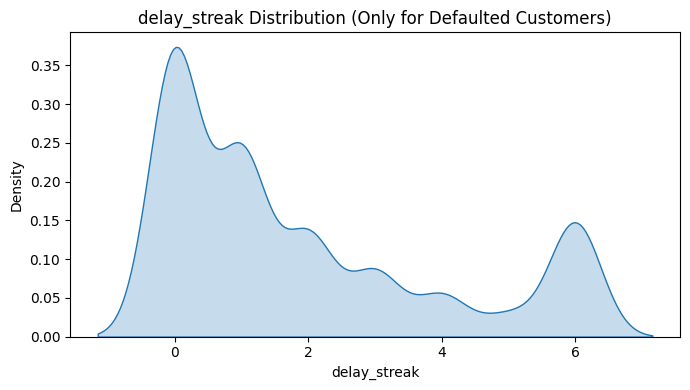

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\1442291507.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['next_month_default'] == 1][col], shade=True)


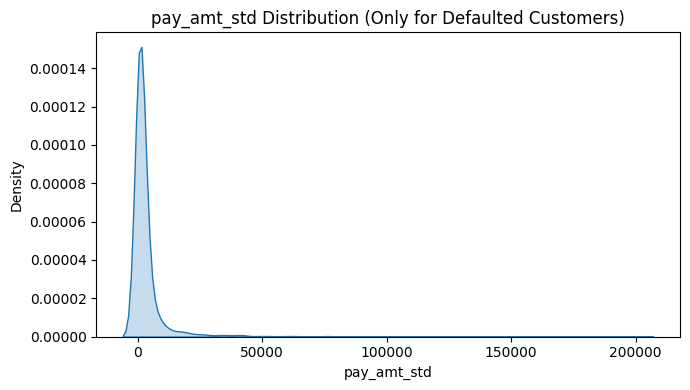

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\1442291507.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['next_month_default'] == 1][col], shade=True)


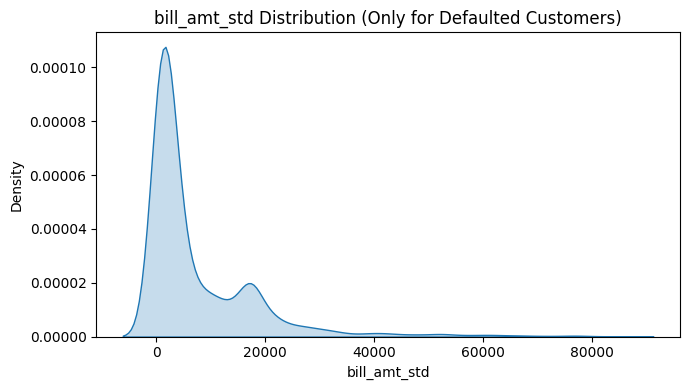

In [434]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]

df['total_bill_amt'] = df[bill_cols].sum(axis=1)
df['total_pay_amt'] = df[pay_cols].sum(axis=1)
df['repayment_ratio'] = df['total_pay_amt'] / (df['total_bill_amt'] + 1)  # +1 to avoid div by 0

df['credit_utilization'] = df['total_bill_amt'] / (df['LIMIT_BAL'] + 1)

delay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df['avg_delay'] = df[delay_cols].replace([-2, -1], 0).mean(axis=1)

def longest_delay_streak(row):
    values = row[delay_cols].tolist()
    max_streak = curr = 0
    for val in values:
        if val >= 1:
            curr += 1
            max_streak = max(max_streak, curr)
        else:
            curr = 0
    return max_streak
df['delay_streak'] = df.apply(longest_delay_streak, axis=1)

df['pay_amt_std'] = df[pay_cols].std(axis=1)
df['bill_amt_std'] = df[bill_cols].std(axis=1)



# sns.kdeplot(df[df['next_month_default'] == 1]['credit_utilization'], label='Defaulted (1)', shade=True)
# plt.title('Credit Utilization Distribution by Default Status')
# plt.xlabel('Credit Utilization')
# plt.legend()
# plt.show()

eng_cols = [
    'credit_utilization',
    'repayment_ratio',
    'avg_delay',
    'delay_streak',
    'pay_amt_std',
    'bill_amt_std'
]

# Plotting each column for defaulted customers (next_month_default == 1)
for col in eng_cols:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(df[df['next_month_default'] == 1][col], shade=True)
    plt.title(f'{col} Distribution (Only for Defaulted Customers)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


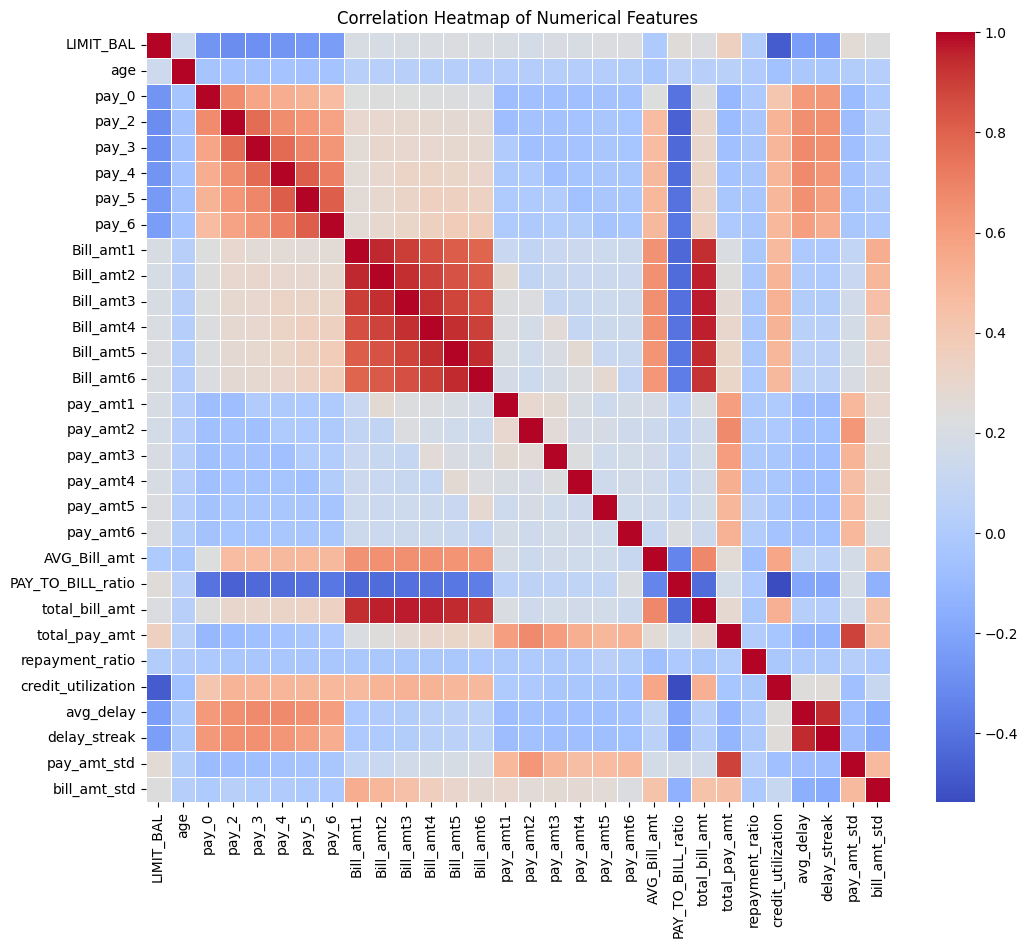

No numeric target column found for correlation.


In [435]:
# Select numeric features only (exclude target if present)
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
# Append target
full_corr = df.corr(numeric_only=True)
if 'next_month_default' in full_corr.columns:
	target_corr = full_corr['next_month_default'].sort_values(ascending=False)
	print("Correlation with target (default):")
	print(target_corr)
else:
	print("No numeric target column found for correlation.")
